[View in Colaboratory](https://colab.research.google.com/github/mtgorori/DLwithPython-Keras/blob/master/Chapter_2_4_3_1_%E5%8B%BE%E9%85%8D%E3%81%A8%E6%9C%80%E9%80%9F%E9%99%8D%E4%B8%8B%E6%B3%95.ipynb)

# 2.4 勾配ベースの最適化

 $output = relu(dot(W, input)) + b$

W: 重み  (weight)  
 b:  訓練可能パラメータ(trainable parameter)

In [0]:
import numpy as np
import matplotlib.pylab as plt

In [0]:
input = np.array([1, 2])

In [35]:
input.shape

(2,)

* インスタンス変数"shape"  : 各次元の要素数を示す．  

* (2, )の意味：inputが1行2列の一次元行列．  
  * 仮にinputが2行1列の縦ベクトルであった場合，(2, 1)となる. 

In [0]:
input2 = np.array([[1], [2]])

In [37]:
print(input2)

[[1]
 [2]]


In [38]:
input2.shape

(2, 1)

In [39]:
print(input)

[1 2]


In [0]:
W = np.array([[1, -3, 5], [-2, 4, 6]])

In [41]:
W.shape

(2, 3)

In [42]:
W.size

6

In [43]:
print(W)

[[ 1 -3  5]
 [-2  4  6]]


In [0]:
Y = np.dot(input, W)

In [45]:
Y.shape

(3,)

In [46]:
print(input)
print(W)
print(Y)

[1 2]
[[ 1 -3  5]
 [-2  4  6]]
[-3  5 17]


In [0]:
b = np.array([0.5, 1.0, 1.5])

In [0]:
def relu(x):
  return np.maximum(0, x)

<img width=400 src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Rectifier_and_softplus_functions.png">  
緑：ソフトプラス関数  
$\varphi (x)=log(1+e^x) $  
青：ReLU($Rectified$ $Linear$ $Unit$)関数  
$\varphi(x)=x_+=max(x,0)$  
Yann LeCun(@ylecun) やジェフリー・ヒントンらが雑誌ネイチャーに書いた論文では、2015年5月現在これが最善であるとしている

In [0]:
  output = relu(np.dot(input, W) + b)

In [50]:
print(output)

[ 0.   6.  18.5]


$input = \begin{pmatrix}
1 & 2
\end{pmatrix}$,    $W = \begin{pmatrix}
1 &- 3 & 5 \\
-2 & 4 & 6\\
\end{pmatrix}$, 
$dot(input, W) = \begin{pmatrix}
-3 & 5 & 17 \\
\end{pmatrix}$,  
***
$b = \begin{pmatrix}
0.5 & 1.0 & 1.5 \\
\end{pmatrix}$, 
***
$dot(input, W) + b=\begin{pmatrix}
-2.5 & 6 & 18.5 \\
\end{pmatrix}$
***
$output = relu(dot(input, W) + b)= \begin{pmatrix}
0 & 6 & 18.5 \\
\end{pmatrix}$

## 2.4.1 導関数

* $y=f(x)$:実数$x$を新たな実数$y$に写像する**なめらか**な**連続**関数
  * 連続関数
    * $f(x + \epsilon_x)=y+\epsilon_y$
  * なめらかな関数
    * $f(x + \epsilon_x)=y+ a \times \epsilon_x$ 

* 数値微分の例
  * 関数「$y=0.01x^2+0.1x$」を$x=5, x=10$で微分する．

In [0]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

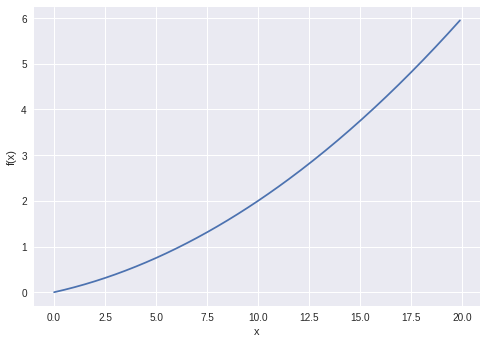

In [52]:
x = np.arange(0.0,20.0,0.1) # 0から20まで0.1刻みのx配列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [0]:
#悪い実装例
def numerical_diff_bad(f,x):
  h = 10e-50
  return (f(x+h) - f(x)) / h

In [54]:
numerical_diff_bad(function_1, 5)

0.0

In [55]:
numerical_diff_bad(function_1, 10)

0.0

  * 改善ポイント①：丸め誤差
    * hが無限小になるのが理想．
    * 一方で，丸め誤差（小数の小さな範囲で数値が省略されることで生じる計算誤差）が結果に悪影響を及ぼしている．

In [56]:
np.float32(1e-50)

0.0

$1.175494 \times 10^{-38} < float の絶対値 < 3.402823 \times 10^{38}$

* 改善ポイント②：関数$f$についての差分が前進差分であること  
![代替テキスト](http://image.gihyo.co.jp/assets/images/book/serial/2007/java-calculation/0070-01.jpg)  
  * 前進差分では，$x$の位置での関数の傾きを，$(x+h)$と$x$の間の傾きで表している
    - 真の接線と今回の実装の値が厳密には一致しない  
    →$h$を無限小にできないため
  * 中心差分により接線の傾きの誤差を軽減することができる
    * $f'(x)=\frac{f(x+h)-f(x-h)}{2h}$
  

In [0]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h)-f(x-h)) / (2*h)

In [58]:
numerical_diff(function_1, 5)

0.1999999999990898

In [59]:
numerical_diff(function_1, 10)

0.2999999999986347

In [0]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898
0.2999999999986347


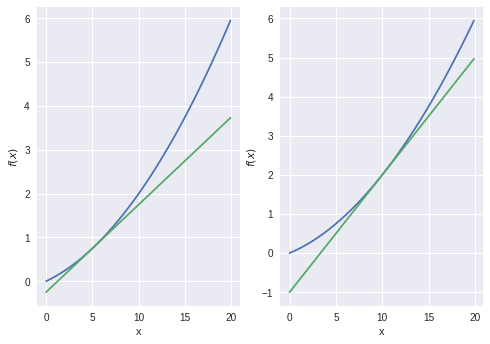

In [61]:
tf = tangent_line(function_1, 5)
y2 = tf(x)
tf2 = tangent_line(function_1, 10)
y3 = tf2(x)
plt.subplot(1,2,1)
plt.plot(x, y)
plt.plot(x, y2)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.subplot(1,2,2)
plt.plot(x, y)
plt.plot(x, y3)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.show()

* $f(x)$の値を最小化するためには，$f'(x)$と逆方向に$x$を移動させる．  


## 2.4.2 テンソル演算の導関数：勾配

* 勾配：導関数の概念を多次元入力の関数として一般化したもの

<img width = 600, src= "https://camo.qiitausercontent.com/9dfab74413ea06e780fe443913ae3a04f9b6dbf3/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3134353036372f36663661323039392d356539632d666233352d333633352d6466643163636361636537612e706e67">  
<br>
$y_{pred}=dot(W, input)$  
<br>
$E=loss(y_{pred}, y)$  
<br>
入力ベクトル$input$と目的値$y$を固定すると，  
<br>
$E = f(W)$  
<br>
重みの初期値$W_0$に対して勾配降下を１ステップ分行う．  
<br>
$W_1=W_0-\alpha \cdot grad(f(W_0))$  
<br>
$W_0$から離れすぎないように$\alpha$で抑制する．

## 2.4.3 確率的勾配降下法

・**ミニバッチ確率的勾配降下法**  
微分可能な関数：解析的に最小値を求めることができる  
　　　　　⇩  【ニューラルネットワークに当てはめる】  
損失関数$E(w)$をできるだけ小さくするような$w$の組み合わせを求める  
→$gradient(E({\bf w}))=0$となる${\bf w}$を求める  
　　　　　⇩  【しかしながら実際は】  
W.size = 10,000~100,000,000~，とネットワーク係数の数は膨大であり，  
全事例について上の式を解くのは手に負えない  
　　　　　⇩  【そこで】  
ランダム(**確率的**)なデータバッチでの現在の損失関数に基づいて，  
パラメータを少しずつ調整していく

![代替テキスト](https://image.slidesharecdn.com/pp-160107085353/95/prml-5-pp227pp247-82-638.jpg?cb=1452156980)  
* **真**の確率的勾配降下法：オンライン学習  
  * 学習データを一つずつ使って逐次的に修正を行っていく．
  * 弱点：外れ値・ノイズによる影響を受けやすい．
  * 特長：処理速度が非常に高速
    * 弱点を補う手法も存在する．（Passive Aggressive-1）


* 損失面についての理解を深める場合には，  
2次元の損失面に沿って勾配降下法を可視化することも可能．
  * 一方で，NNの訓練プロセスが実際にどうなってるかを完全に可視化してみる，  
  というわけにはいかない．
  * ネットワークの重み係数の次元は数万・数百万におよぶため．
  * そのため，低次元の表現を通じて養われる直観が，実際に常に正確であるとは限らない．  
  ![代替テキスト](https://ml4a.github.io/images/figures/bumpy_gradient_descent.png)  
  2つのパラメータ :$\theta _0$と $\theta _1$を持つ非凸損失関数に勾配降下法を適用した例。 出典：Andrew Ng

*  **SGD(確率的勾配降下法)のバリエーション**  
  * 最もシンプルな勾配降下法(SGD)：次の重み$w$を更新するときに現在の勾配を調べる．
    * $\bf {W}\gets\bf{W}-\eta \frac{\partial L}{\partial \bf{W}}$ 
  * バリエーション：以前の重みの更新を考慮に入れるもの
    * 以下のようなバリエーションに多く取り入れられている概念として  
    **モーメンタム(momentum)**がある．
      * モーメンタムの利点
        * シンプルな方法に比べて収束の速度が向上
        * 大域的最小値（Global minimum）に誘導してくれる
        * これらは，モーメンタムの「現在の勾配（加速）だけでなく，過去の加速度の影響も考慮入れている」ことに起因する．
    * 1:モーメンタムSGD(SGD with momentum)
      * $\bf {v}\gets \alpha \bf{v}-\eta \frac{\partial L}{\partial \bf{W}}\\ \bf{W}\gets\bf{W}+\bf{v}$  
      * $\bf{v}$が「速度」に対応する
    * 2:Adagrad  
      * $\bf{h} \gets \bf{h} +\frac{\partial L}{\partial \bf{W}} \odot \frac{\partial L}{\partial \bf{W}}\\\bf{W}\gets\bf{W}-\eta \frac{1}{\sqrt{\bf{h}}}\frac{\partial L}{\partial \bf{W}}$
      * $\bf{h}$はこれまで経験した勾配の値を２乗和として保持する．  
      ($\odot$は行列の要素ごとの掛け算を表す)
      * パラメータ更新のときに$\frac{1}{\sqrt{\bf{h}}}$を乗算することで，学習スケールの調整を行う．
        * パラメータの要素の中でよく動いた（大きく更新された）要素は，学習係数が小さくなることを表している．
        * よく動いたパラメータの学習係数が次第に小さくなるという，**学習係数の減衰**をパラメータの要素ごとに行っている．
      
    * 3: RMSProp
      * $\bf{h} \gets \gamma \bf{h} +(1-\gamma)\frac{\partial L}{\partial \bf{W}} \odot \frac{\partial L}{\partial \bf{W}}\\ \bf{W}\gets\bf{W}-\eta \frac{1}{\sqrt{\bf{h}}}\frac{\partial L}{\partial \bf{W}}$  
      where, $\gamma \simeq 0.9$
      * Adagradには問題点がある．
        * 過去の勾配を２乗和としてすべて記録している
        * そのため，学習が進むにつれて更新度合いが少なくなる
        * 仮に無限回更新した場合，更新量が０に収束する．  
        →さらに大局的最小値に近づくことが不可能
      * RMSPropはAdagradの問題点を解消する
        * Adagradのように過去のすべての勾配を均一に加算するのではなく，  
        **過去の勾配を忘れて**，新しい勾配の情報が大きく反映されるように，  
        重みづけをして加算する．
      
    * これら１～３は，最適化法(optimization method)，オプティマイザ(optimizer)と呼ばれる
    

In [62]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

class SGD:

    """確率的勾配降下法（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y
  
"""初期条件"""
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

"""オプティマイザの辞書配列を作成"""
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)

idx = 1

"""オプティマイザを選択"""
for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    """ここでオプティマイザを繰り返し適用している"""
    for i in range(30):
      """重みと勾配を順次更新する"""
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

IndentationError: ignored